In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('repo_1_developers.csv')
print("Data loaded. Shape:", df.shape)
print("\nFirst few rows:\n", df.head())

Data loaded. Shape: (60, 9)

First few rows:
    developer_id       username  total_prs  total_commits  avg_resolution_days  \
0         40680      tim-smart          1              1                  NaN   
1        252084       alcroito          1              0                  NaN   
2        557887      johnlucas          1              1                  NaN   
3        619795  mahmoudhossam          1              1                  NaN   
4        720151        xthiago          1              1                  NaN   

   total_lines_added  total_lines_removed  code_reviews_participated  \
0                 26                   17                          0   
1                  0                    0                          6   
2                  7                    1                          0   
3                  9                    0                          0   
4                 18                   12                          0   

   id_repository  
0              

In [33]:
# Data Exploration
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nBasic statistics:\n", df.describe())

Missing values:
 developer_id                  0
username                      0
total_prs                     0
total_commits                 0
avg_resolution_days          49
total_lines_added             0
total_lines_removed           0
code_reviews_participated     0
id_repository                 0
dtype: int64

Data types:
 developer_id                   int64
username                      object
total_prs                      int64
total_commits                  int64
avg_resolution_days          float64
total_lines_added              int64
total_lines_removed            int64
code_reviews_participated      int64
id_repository                  int64
dtype: object

Basic statistics:
        developer_id   total_prs  total_commits  avg_resolution_days  \
count  6.000000e+01   60.000000      60.000000            11.000000   
mean   3.157099e+07    7.966667     338.183333            21.232664   
std    3.175767e+07   18.238502    1183.604871            16.749586   
min    4.068000e+

In [37]:

from sklearn.preprocessing import StandardScaler
# Handle missing values by filling with 0 (or use other imputation methods if necessary)
df[['total_prs', 'total_commits', 'avg_resolution_days', 
    'total_lines_added', 'total_lines_removed', 
    'code_reviews_participated']] = df[['total_prs', 'total_commits', 
    'avg_resolution_days', 'total_lines_added', 
    'total_lines_removed', 'code_reviews_participated']].fillna(0)

# Standardize features using StandardScaler
scaler = StandardScaler()
df[['total_prs', 'total_commits', 'avg_resolution_days', 
    'total_lines_added', 'total_lines_removed', 
    'code_reviews_participated']] = scaler.fit_transform(
    df[['total_prs', 'total_commits', 'avg_resolution_days', 
        'total_lines_added', 'total_lines_removed', 
        'code_reviews_participated']]
)

# Compute custom score using scaled features
df['score'] = (
    0.3 * df['total_prs'] +
    0.3 * df['total_commits'] +
    0.1 * df['avg_resolution_days'] +
    0.15 * df['total_lines_added'] +
    0.1 * df['total_lines_removed'] +
    0.05 * df['code_reviews_participated']
)

# Scale the score to 100%
df['score'] = (df['score'] - df['score'].min()) / (df['score'].max() - df['score'].min()) * 100

# Add developer index for reference
df['developer_index'] = df.index

# Select features for clustering
features = ['score']
X = df[features].copy()

# Handle any remaining missing values in 'score' (shouldn't be needed after handling above)
X = X.fillna(0)

# Standardize the features for clustering
X_scaled = scaler.fit_transform(X)

# Verify missing values in the 'score' column
print("\nMissing values in the 'score' column after handling:")
print(df['score'].isnull().sum())

# Check the first few rows with the updated score column
print("\nFirst few rows with the updated score column:")
print(df[['developer_index', 'score']])



Missing values in the 'score' column after handling:
0

First few rows with the updated score column:
    developer_index       score
0                 0    5.998684
1                 1    6.001870
2                 2    5.998457
3                 3    5.998462
4                 4    5.998600
5                 5    6.670343
6                 6   47.985513
7                 7    6.679143
8                 8    5.994674
9                 9    6.008484
10               10    6.014885
11               11    5.998603
12               12    6.337516
13               13   40.633486
14               14    6.334197
15               15    7.019244
16               16    5.998673
17               17    5.993234
18               18    6.334184
19               19   41.156308
20               20    5.993234
21               21    5.999809
22               22    8.047215
23               23    1.284331
24               24   35.197328
25               25    6.000091
26               26    9.060031
2

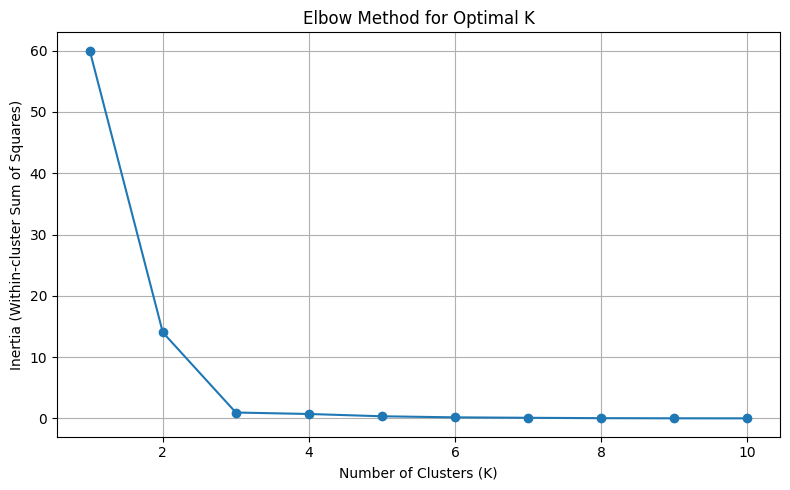

In [38]:
# Elbow Method to find the optimal number of clusters based on score and developer index

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.tight_layout()
plt.show()


Silhouette Score for k=2: 0.923
Silhouette Score for k=3: 0.946
Silhouette Score for k=4: 0.835
Silhouette Score for k=5: 0.869
Silhouette Score for k=6: 0.847
Silhouette Score for k=7: 0.813
Silhouette Score for k=8: 0.815
Silhouette Score for k=9: 0.798
Silhouette Score for k=10: 0.768


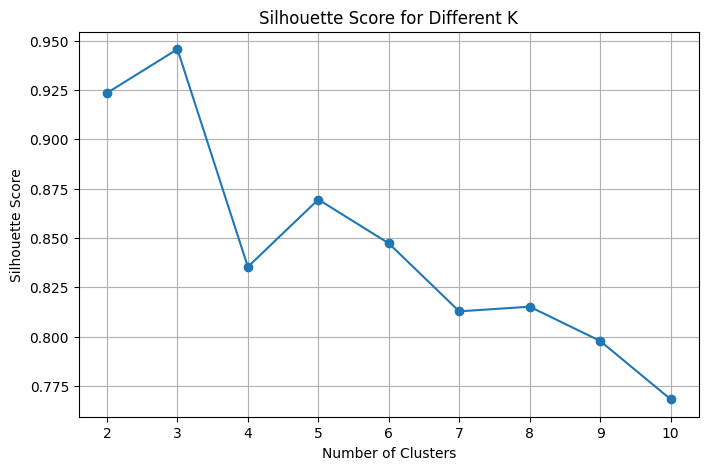

In [39]:
# Silhouette Score to evaluate clustering quality
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid(True)
plt.show()

In [40]:
# Check if 'score' column exists and is populated
print("\nFirst few rows with score column:\n", df[['developer_index', 'score']].head())

# Apply KMeans Clustering with k=2 (optimal choice based on Silhouette Score)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

# Verify cluster assignment
print(f"\nKMeans clustering applied with {optimal_k} clusters.")
print("\nCluster distribution:\n", df['cluster'].value_counts())

# Check column names to avoid referencing errors
print("\nColumns in the DataFrame:", df.columns)

# Display first few rows including the cluster labels
print("\nFirst few rows with cluster labels:\n", df[['developer_index', 'score', 'cluster']].head())



First few rows with score column:
    developer_index     score
0                0  5.998684
1                1  6.001870
2                2  5.998457
3                3  5.998462
4                4  5.998600

KMeans clustering applied with 3 clusters.

Cluster distribution:
 cluster
0    54
2     4
1     2
Name: count, dtype: int64

Columns in the DataFrame: Index(['developer_id', 'username', 'total_prs', 'total_commits',
       'avg_resolution_days', 'total_lines_added', 'total_lines_removed',
       'code_reviews_participated', 'id_repository', 'score',
       'developer_index', 'cluster'],
      dtype='object')

First few rows with cluster labels:
    developer_index     score  cluster
0                0  5.998684        0
1                1  6.001870        0
2                2  5.998457        0
3                3  5.998462        0
4                4  5.998600        0


In [42]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=[ 'score'])
print("Cluster Centroids (original scale):\n", centroids_df)


Cluster Centroids (original scale):
        score
0   6.288070
1  99.661915
2  41.243159


In [43]:
print("Number of clusters:", len(kmeans.cluster_centers_))


Number of clusters: 3


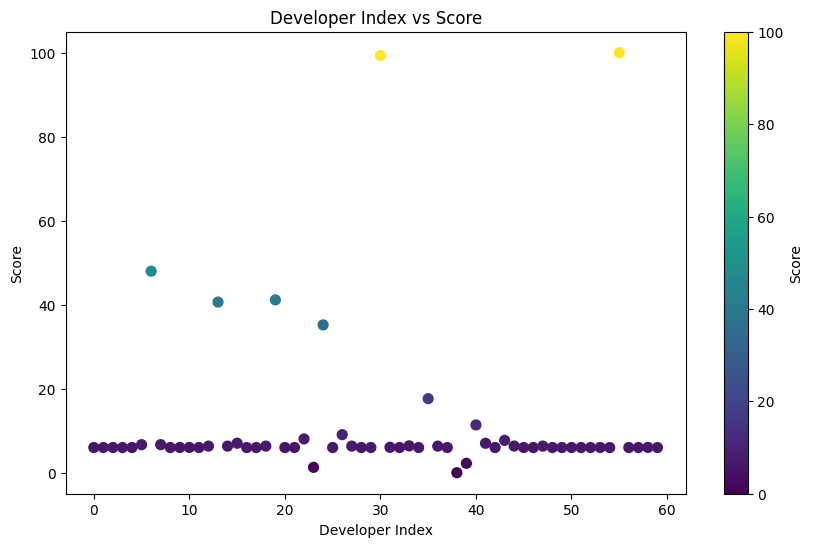

In [47]:
# Developer Index vs Score
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['score'], c=df['score'], cmap='viridis', s=50)
plt.xlabel('Developer Index')
plt.ylabel('Score')
plt.title('Developer Index vs Score')
plt.colorbar(label='Score')
plt.show()


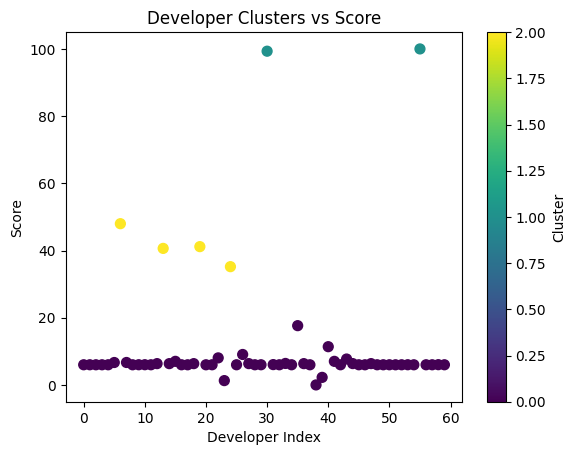

In [49]:
plt.scatter(df.index, df['score'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Developer Index')
plt.ylabel('Score')
plt.title('Developer Clusters vs Score')
plt.colorbar(label='Cluster')
plt.show()


In [48]:
print("\nFinal Cluster Summary:")
print("Cluster Distribution:\n", df['cluster'].value_counts())
print("\nCluster Centroids (original scale):\n", centroids_df)
print("\nClustering complete. Review the saved CSV for detailed results.")


Final Cluster Summary:
Cluster Distribution:
 cluster
0    54
2     4
1     2
Name: count, dtype: int64

Cluster Centroids (original scale):
        score
0   6.288070
1  99.661915
2  41.243159

Clustering complete. Review the saved CSV for detailed results.
